## LetsGrowMore

## Name: Aman Pandey

## Task No. : 2 (Part 2)

## Task Level : Intermediate

## Task Name : Prediction using Decision Tree  Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset into pandas

In [4]:
data=pd.read_csv("Iris.csv")
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

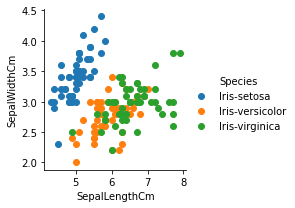

In [39]:
sns.FacetGrid(data, hue='Species') \
   .map(plt.scatter,'SepalLengthCm','SepalWidthCm') \
   .add_legend()
plt.show()

### Data Visualization

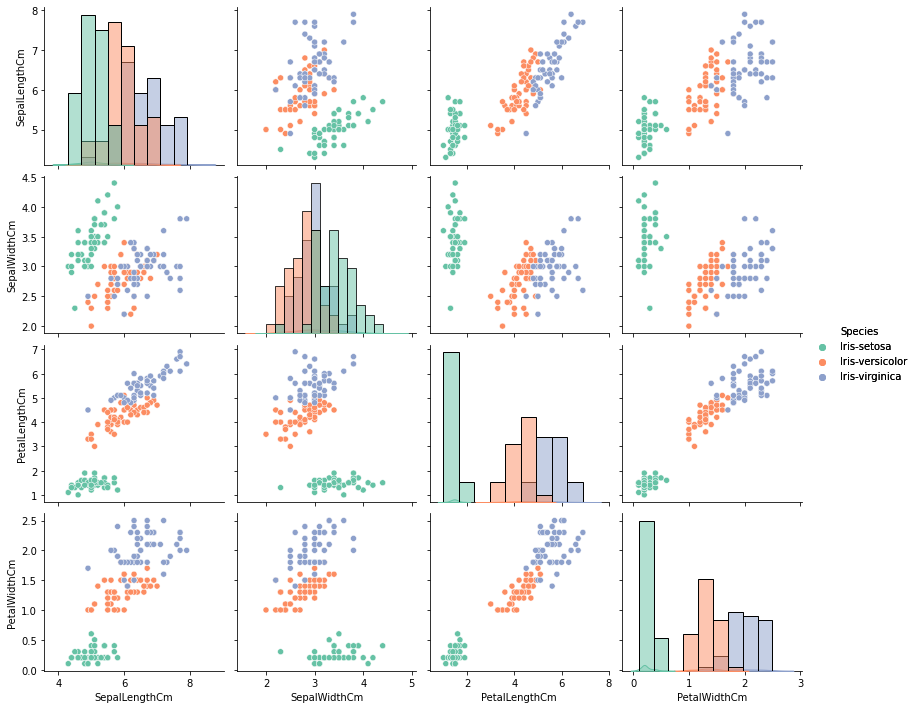

In [47]:
a=sns.pairplot(data.drop(['Id'],axis=1,),hue='Species',palette='Set2')
a.map_diag(sns.histplot)
a.add_legend()

### Build the decision tree Algorithm

In [50]:
from sklearn import tree 
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [51]:
x = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']

### Split the data into train and test dataset

In [53]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=42)


In [54]:
# Split the data into validation into train and test dataset
xt, xv, yt, yv= train_test_split(x_train,y_train, test_size=0.10, random_state=42)

In [56]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=2)
model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text

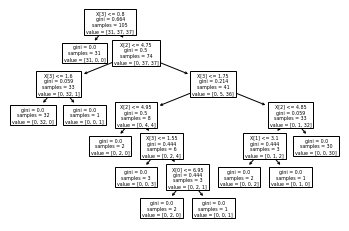

In [57]:
tree.plot_tree(model)

In [59]:
print('Accuracy score =',cross_val_score(model, xt, yt, cv=3, scoring='accuracy').mean())

Accuracy score = 0.9361559139784946


# Check the validation data

In [61]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
pred = model.predict(xv)
print('Accuracy score for validation test data is:',accuracy_score(yv,pred))
multilabel_confusion_matrix(yv, pred)

Accuracy score for validation test data is: 1.0


array([[[10,  0],
        [ 0,  1]],

       [[ 4,  0],
        [ 0,  7]],

       [[ 8,  0],
        [ 0,  3]]], dtype=int64)